# Поиск особенностей в изображении
Выполнил: Гришин К. И.

In [214]:
import os

import cv2
import matplotlib.pyplot as plt

import numpy as np

## Задача
Реализовать на языке Python с использованием библиотеки OpenCV программу, выполняющее поиск окружностей в изображении путем преобразования Хо (Hough)

## Входные данные

In [215]:
# Путь до входного изображения
image_path = "circles.jpg"

# Минимальное расстояние между центрами окружностей
minimal_center_distance = 100

# Минимальный радиус окружности
minimal_radius = 50

# Максимальный радиус окружности
maximal_radius = 110


def show_image(image):
    h, w = image.shape[:2]
    plt.figure(figsize=(w/150, h/150))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


## Чтение изображения

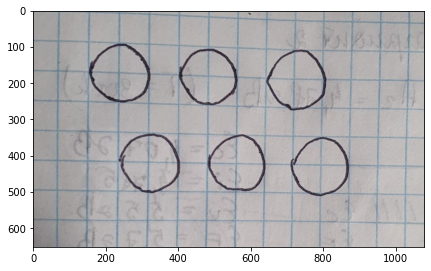

In [216]:
absoulte_path = os.path.abspath(image_path)
image = cv2.imread(absoulte_path)
show_image(image)

## Поиск окружностей

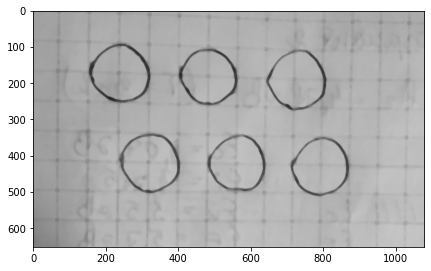

In [217]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.medianBlur(gray_image, 11)
show_image(gray_image)

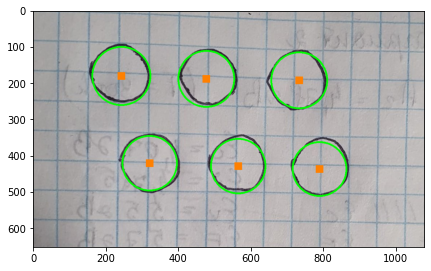

In [218]:

circles = cv2.HoughCircles(
    image=gray_image,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=minimal_center_distance,
    minRadius=minimal_radius,
    maxRadius=maximal_radius
)

output = image.copy()

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x-10, y-10), (x+10, y+10), (0, 128, 255), -1)

show_image(output)